<a href="https://colab.research.google.com/github/sorengod/MasterThesis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot, dates
import datetime as dt
import statsmodels.api as sm


In [ ]:
df = pd.read_parquet('Spot_Prices.parq')
df.to_excel('Spot_Prices_From_Parquet.xlsx')
df = pd.read_excel('Spot_Prices_From_Parquet.xlsx')
df[['HourDK']] = df[['HourDK']].apply(pd.to_datetime)
#df = df.set_index('HourDK')

In [3]:
df = pd.read_excel('Spot_Prices.xlsx')
df[['HourDK']] = df[['HourDK']].apply(pd.to_datetime)

In [57]:
class Time_Series:

    def __init__ (self, df:pd.DataFrame, DateColumn='HourDK'):
        self.DateColumn = 'HourDK'
        self.df = df
        #self.df.set_index('HourDK')

    def extract_date_columns(self):
        #self.df = self.df.set_index(self.DateColumn)
        self.df['Year'] = self.df[self.DateColumn].dt.year
        self.df['Month'] = self.df[self.DateColumn].dt.month
        self.df['Date'] = self.df[self.DateColumn].dt.date
        self.df['Day_Of_Week'] = self.df[self.DateColumn].dt.strftime('%A')
        self.df.set_index('HourDK')
        return self.df
    
    def plot_prices(self, PriceAreas = []):
      self.df = self.df.set_index(self.DateColumn)
      self.df = self.df
      for PriceArea in PriceAreas:
        self.df.plot(y=PriceArea, use_index=True, figsize=(25,2), linewidth='.5', color = 'k')
    
    def plot_resample(self, Period:str, PriceAreas = []):
      help_df = self.df
      #help_df = help_df.set_index(self.DateColumn)
      for PriceArea in PriceAreas:
        plot_data = pd.DataFrame(data=help_df, columns = [PriceArea])
        plot_data.resample(Period).mean().plot(y=PriceArea, use_index=True, figsize=(25,2), linewidth='.5', color = 'k')
    
    def _group_by_hour(self, PriceArea):

      help_df = self.df[[self.DateColumn, PriceArea]]
      help_df.set_index(self.DateColumn, inplace=True)

      dates = help_df.index
      prices = help_df.values.tolist()
      dates_price_df = pd.Series(prices, index=dates)

      # Group prices by hour
      grouped = dates_price_df.groupby(dates_price_df.index.hour).apply(list)

      return grouped
    
    def plot_grouped_period(self, PriceArea):
      grouped_prices = self._group_by_hour(PriceArea)
      x = 6
      y = 3
      fig, axs = pyplot.subplots(x, y)      

      for period in range(len(grouped_prices)): 

        series = pd.DataFrame(grouped_prices[period])[:200]
        series.columns = [f'Period{period}']
        series.plot(y=f'Period{period}', use_index=True, figsize=(8,5), linewidth='.5', color = 'k')
      
      #return grouped_prices

object = Time_Series(df)

In [ ]:
object.plot_prices(['DK1', 'DK2', 'NO2', 'SE3', 'SE4'])

In [ ]:
object.plot_grouped_period('DK2')

In [ ]:
# fig, axs = pyplot.subplots(2, 2)

# series = pd.DataFrame(grouped_prices[period])[:200]
# series.columns = [f'Period{period}']
# series.plot(y=f'Period{period}', use_index=True, figsize=(8,5), linewidth='.5', color = 'k')

In [ ]:
object.plot_grouped_period('DK2')

In [ ]:
object.plot_resample('1D', ['DK1', 'DK2', 'NO2', 'SE3', 'SE4'])

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)

In [50]:
series = pd.DataFrame(grouped[0])
series.columns = ['Values1']
series.plot(y='Values1', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[1])
series.columns = ['Values2']
series.plot(y='Values2', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[2])
series.columns = ['Values3']
series.plot(y='Values3', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[3])
series.columns = ['Values4']
series.plot(y='Values4', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[4])
series.columns = ['Values5']
series.plot(y='Values5', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[5])
series.columns = ['Values6']
series.plot(y='Values6', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[6])
series.columns = ['Values7']
series.plot(y='Values7', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[7])
series.columns = ['Values8']
series.plot(y='Values8', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[8])
series.columns = ['Values9']
series.plot(y='Values9', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[9])
series.columns = ['Values10']
series.plot(y='Values10', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[10])
series.columns = ['Values11']
series.plot(y='Values11', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[11])
series.columns = ['Values12']
series.plot(y='Values12', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[12])
series.columns = ['Values13']
series.plot(y='Values13', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[13])
series.columns = ['Values14']
series.plot(y='Values14', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[14])
series.columns = ['Values15']
series.plot(y='Values15', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[15])
series.columns = ['Values16']
series.plot(y='Values16', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[16])
series.columns = ['Values17']
series.plot(y='Values17', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[17])
series.columns = ['Values18']
series.plot(y='Values18', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[18])
series.columns = ['Values19']
series.plot(y='Values19', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[19])
series.columns = ['Values20']
series.plot(y='Values20', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[20])
series.columns = ['Values21']
series.plot(y='Values21', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[21])
series.columns = ['Values22']
series.plot(y='Values22', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[22])
series.columns = ['Values23']
series.plot(y='Values23', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')


NameError: ignored

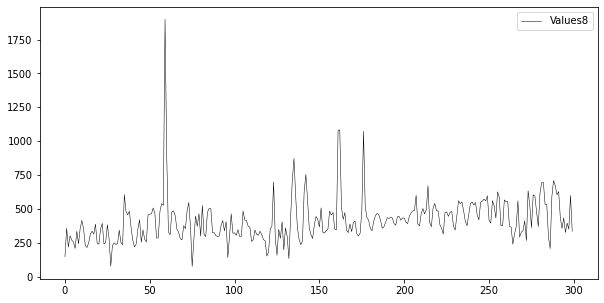

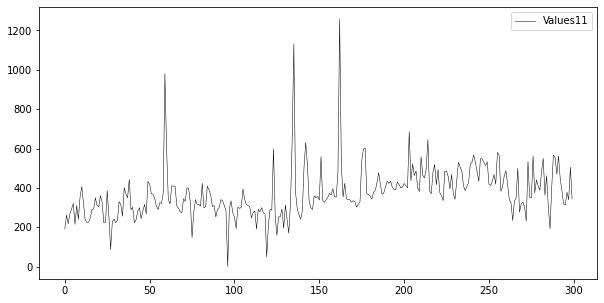

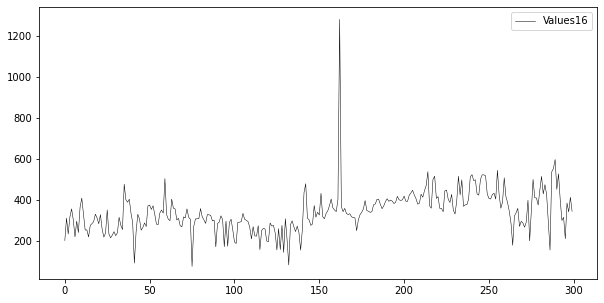

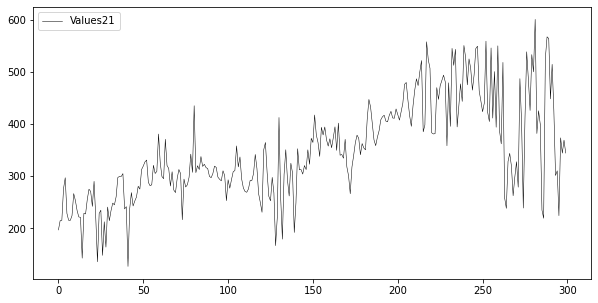

In [487]:
series = pd.DataFrame(grouped[8][:300])
series.columns = ['Values8']
series.plot(y='Values8', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[11][:300])
series.columns = ['Values11']
series.plot(y='Values11', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[16][:300])
series.columns = ['Values16']
series.plot(y='Values16', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')

series = pd.DataFrame(grouped[21][:300])
series.columns = ['Values21']
series.plot(y='Values21', use_index=True, figsize=(10,5), linewidth='.5', color = 'k')